Mounted at /content/drive


In [6]:
import os
from collections import Counter
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Now this import should work
from skimage.metrics import structural_similarity as ssim
from sklearn.decomposition import PCA

In [ ]:
print("OpenCV version:", cv2.__version__)
print("NumPy version:", np.__version__)

OpenCV version: 4.11.0
NumPy version: 2.0.2


In [13]:
import os
print(os.getcwd())


c:\Users\MSC008\Desktop\707


In [19]:
import os
from collections import Counter

data_path = r"c:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Original Dataset"


classes = os.listdir(data_path)
class_counts = Counter([cls for cls in classes])
print(class_counts)

Counter({'1_2.jpg': 1, '5_6.jpg': 1, '9_10.jpg': 1, 'Ba_36.jpg': 1, 'Bha_37.jpg': 1, 'Na_33.jpg': 1, 'Ta_29.jpg': 1, 'Tha_30.jpg': 1})


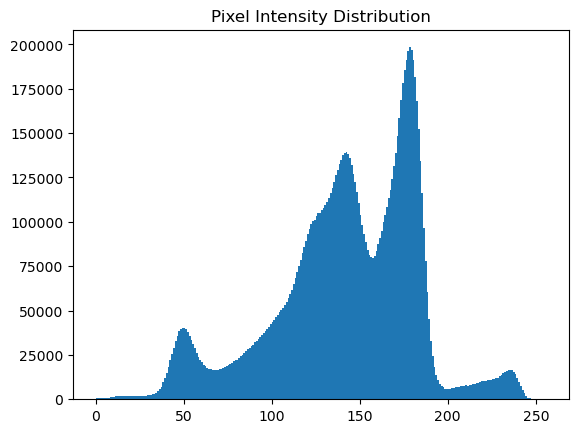

In [22]:
sample_image = cv2.imread(r'c:\Users\MSC008\Desktop\707\Project Dataset\Project dataset\Original Dataset\1_2.jpg', 0)

plt.hist(sample_image.ravel(), bins=256, range=[0, 256])
plt.title("Pixel Intensity Distribution")
plt.show()

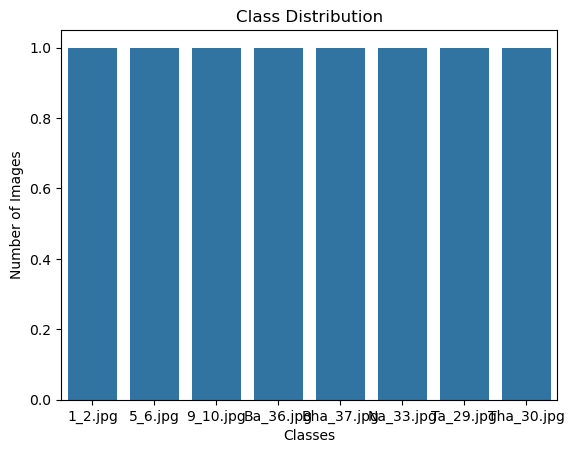

In [23]:
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

In [24]:
from PIL import Image


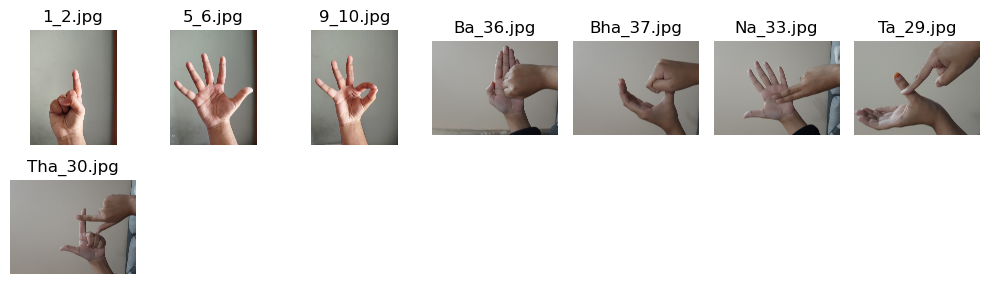

In [25]:
folder_path = r"c:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Original Dataset"
# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

# Plot all images
plt.figure(figsize=(10, 10))
for i, file in enumerate(image_files):
    img_path = os.path.join(folder_path, file)
    img = Image.open(img_path)  # Open the image

    # Display the image
    plt.subplot(7, 7, i + 1)  # Adjust rows and columns as needed
    plt.imshow(img)
    plt.axis('off')
    plt.title(file[:10])  # Show the first 10 characters of the file name

plt.tight_layout()
plt.show()

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical

In [29]:
import os
import re

def preprocess_images_no_folders(data_dir, img_size=128):
    images = []
    labels = []

    # Regex to extract the label from the filename
    label_pattern = re.compile(r"symbol_(\d+)")  # Adjust regex to match your filename format

    for img_name in os.listdir(data_dir):
        img_path = os.path.join(data_dir, img_name)
        match = label_pattern.search(img_name)

        if match:  # Extract label if it matches
            label = int(match.group(1))
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(label)

    images = np.array(images).reshape(-1, img_size, img_size, 1) / 255.0  # Normalize
    labels = np.array(labels)
    return images, labels

data_dir = r"c:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Original Dataset"
images, labels = preprocess_images_no_folders(data_dir)

In [31]:
drive_path = r"G:\My Drive\Project Dataset\Project Dataset\Original Dataset"


In [ ]:
"!!!DON'T RUN THIS CELL!!!'" "#!! DON'T RUN THIS CELL" "# DON'T RUN THIS CELL"

# Define data augmentation
# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Paths for saving augmented images
# input_dir = "/content/drive/MyDrive/MSc/CSE707/CSE707 Group project/Project dataset/Original Dataset"
# output_dir = "/content/drive/MyDrive/MSc/CSE707/CSE707 Group project/Project dataset/Augmented Dataset"
# os.makedirs(output_dir, exist_ok=True)

# # Augment and save images
# augment_count = 5  # Number of augmented images per original image
# for img_name in os.listdir(input_dir):
#     img_path = os.path.join(input_dir, img_name)
#     img = load_img(img_path, color_mode='grayscale')  # Load image
#     img_array = img_to_array(img)  # Convert to numpy array
#     img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for generator

#     # Generate augmented images and save
#     i = 0
#     for batch in datagen.flow(img_array, batch_size=1,
#                               save_to_dir=output_dir,
#                               save_prefix=f"aug_{os.path.splitext(img_name)[0]}",
#                               save_format='jpg'):
#         i += 1
#         if i >= augment_count:  # Stop after generating the desired number
#             break

"!!!DON'T RUN THIS CELL!!!'#!! DON'T RUN THIS CELL# DON'T RUN THIS CELL"

In [ ]:
# x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=47)
# y_val = tf.keras.utils.to_categorical(y_val, num_classes=47)

In [36]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img

# Paths
input_folder = r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Original Dataset"
output_folder = r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Augmented Dataset"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Define augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Loop through all images in the input folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(input_folder, filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate 5 augmented images per original
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=output_folder,
                                  save_prefix='aug_' + os.path.splitext(filename)[0],
                                  save_format='jpg'):
            i += 1
            if i >= 5:
                break


In [37]:
import os
from collections import Counter

def get_class_counts(folder_path):
    classes = os.listdir(folder_path)
    class_counts = Counter([cls for cls in classes])
    return class_counts

# Use raw strings or double slashes
original_counts = get_class_counts(r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Original Dataset")
augmented_counts = get_class_counts(r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Augmented Dataset")

print("Original Dataset Counts:", original_counts)
print("Augmented Dataset Counts:", augmented_counts)


Original Dataset Counts: Counter({'1_2.jpg': 1, '5_6.jpg': 1, '9_10.jpg': 1, 'Ba_36.jpg': 1, 'Bha_37.jpg': 1, 'Na_33.jpg': 1, 'Ta_29.jpg': 1, 'Tha_30.jpg': 1})
Augmented Dataset Counts: Counter({'aug_1_2_0_2549.jpg': 1, 'aug_1_2_0_6527.jpg': 1, 'aug_1_2_0_7594.jpg': 1, 'aug_1_2_0_7767.jpg': 1, 'aug_1_2_0_9878.jpg': 1, 'aug_5_6_0_1428.jpg': 1, 'aug_5_6_0_5061.jpg': 1, 'aug_5_6_0_7046.jpg': 1, 'aug_5_6_0_7137.jpg': 1, 'aug_5_6_0_7972.jpg': 1, 'aug_9_10_0_5585.jpg': 1, 'aug_9_10_0_641.jpg': 1, 'aug_9_10_0_7572.jpg': 1, 'aug_9_10_0_8410.jpg': 1, 'aug_9_10_0_9682.jpg': 1, 'aug_Ba_36_0_2028.jpg': 1, 'aug_Ba_36_0_548.jpg': 1, 'aug_Ba_36_0_6574.jpg': 1, 'aug_Ba_36_0_7202.jpg': 1, 'aug_Ba_36_0_8330.jpg': 1, 'aug_Bha_37_0_2101.jpg': 1, 'aug_Bha_37_0_5416.jpg': 1, 'aug_Bha_37_0_7144.jpg': 1, 'aug_Bha_37_0_7359.jpg': 1, 'aug_Bha_37_0_7955.jpg': 1, 'aug_Na_33_0_1179.jpg': 1, 'aug_Na_33_0_1539.jpg': 1, 'aug_Na_33_0_443.jpg': 1, 'aug_Na_33_0_4610.jpg': 1, 'aug_Na_33_0_9761.jpg': 1, 'aug_Ta_29_0_1030.

Total originial data size: 8
Total augmented data size: 40


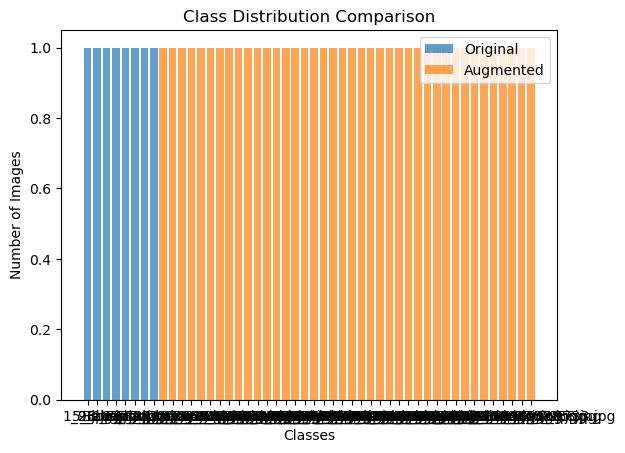

In [38]:

print('Total originial data size:',sum(original_counts.values()))
print('Total augmented data size:',sum(augmented_counts.values()))

plt.bar(original_counts.keys(), original_counts.values(), label='Original', alpha=0.7)
plt.bar(augmented_counts.keys(), augmented_counts.values(), label='Augmented', alpha=0.7)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.legend()
plt.title('Class Distribution Comparison')
plt.show()




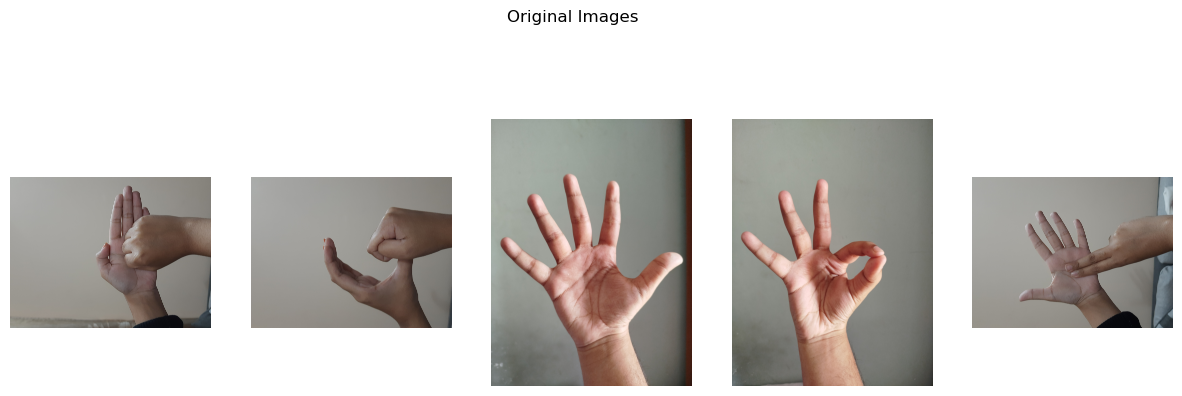

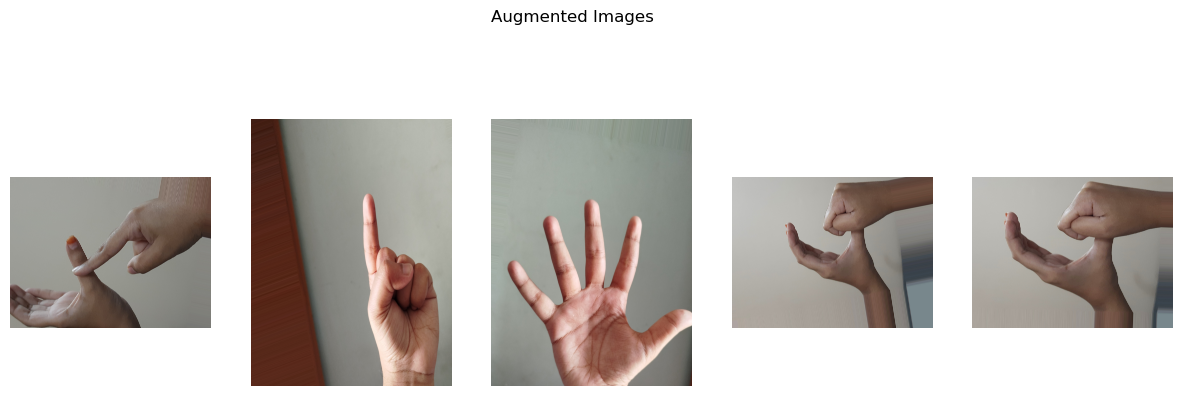

In [42]:
import random
from PIL import Image

def show_random_images(folder_path, title):
    random_images = random.sample(os.listdir(folder_path), 5)  # Select 5 random images
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(random_images):
        img = Image.open(os.path.join(folder_path, img_file))
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_random_images(
    r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Original Dataset",
    "Original Images"
)

show_random_images(
    r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Augmented Dataset",
    "Augmented Images"
)


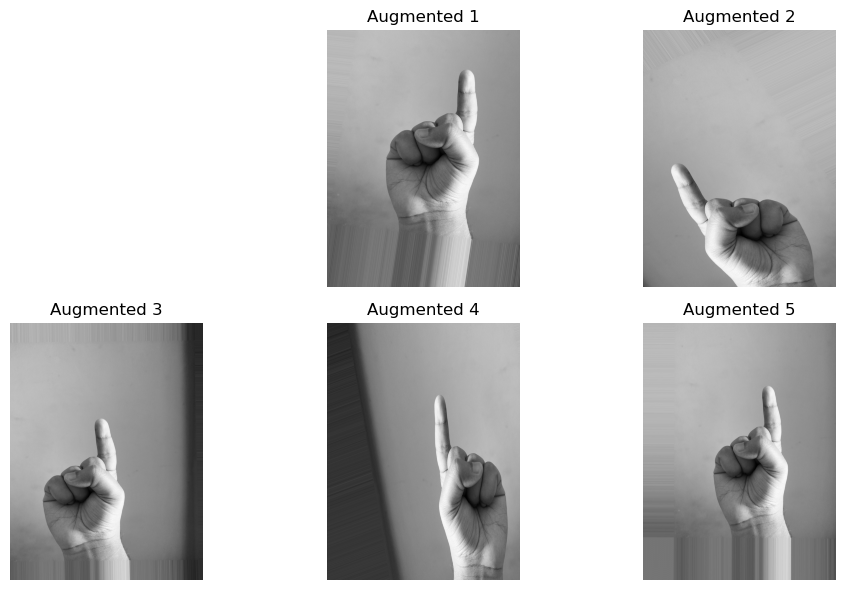

In [43]:
import os
import matplotlib.pyplot as plt
import cv2

# Paths to folders
original_folder = r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Original Dataset" #
augmented_folder = r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Augmented Dataset"

# Get the first image from the original folder
original_image_name = os.listdir(original_folder)[0]
original_image_path = os.path.join(original_folder, original_image_name)
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

# Get the first 5 images from the augmented folder
augmented_image_names = os.listdir(augmented_folder)[:5]
augmented_images = [
    cv2.imread(os.path.join(augmented_folder, img_name), cv2.IMREAD_GRAYSCALE)
    for img_name in augmented_image_names
]

# Plotting
plt.figure(figsize=(10, 6))

# Plot original image (large size)
# plt.subplot(2, 3, 1)
# plt.imshow(original_image)
# plt.title("Original Image")
# plt.axis("off")

# Plot augmented images (smaller size)
for i, aug_img in enumerate(augmented_images, start=2):
    plt.subplot(2, 3, i)
    plt.imshow(aug_img, cmap="gray")
    plt.title(f"Augmented {i - 1}")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# def plot_pixel_distribution(folder_path, title):
#     all_pixels = []
#     for img_file in os.listdir(folder_path):
#         img = cv2.imread(os.path.join(folder_path, img_file), 0)
#         all_pixels.extend(img.ravel())
#     plt.hist(all_pixels, bins=256, range=[0, 256], alpha=0.7)
#     plt.title(title)
#     plt.xlabel('Pixel Intensity')
#     plt.ylabel('Frequency')
#     plt.show()

# plot_pixel_distribution('/content/drive/MyDrive/MSc/CSE707/CSE707 Group project/Project dataset/Original Dataset', 'Original Dataset Pixel Intensity')
# plot_pixel_distribution('/content/drive/MyDrive/MSc/CSE707/CSE707 Group project/Project dataset/Augmented Dataset', 'Augmented Dataset Pixel Intensity')


In [44]:
def resize_with_padding(input_folder, output_folder, size=(128, 128)):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    for file in os.listdir(input_folder):
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            input_path = os.path.join(input_folder, file)
            output_path = os.path.join(output_folder, file)

            # Read the image
            img = cv2.imread(input_path)
            if img is None:
                continue

            # Resize while keeping the aspect ratio
            h, w = img.shape[:2]
            scale = min(size[0] / h, size[1] / w)
            new_w, new_h = int(w * scale), int(h * scale)
            resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

            # Add padding to center the image
            top = (size[1] - new_h) // 2
            bottom = size[1] - new_h - top
            left = (size[0] - new_w) // 2
            right = size[0] - new_w - left
            padded_img = cv2.copyMakeBorder(resized_img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))

            # Save the final padded image
            cv2.imwrite(output_path, padded_img)

    print(f"Images resized to {size} with padding and saved to '{output_folder}'")

# Example usage
resize_with_padding(r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Augmented Dataset", r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Padded Dataset")

Images resized to (128, 128) with padding and saved to 'C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Padded Dataset'


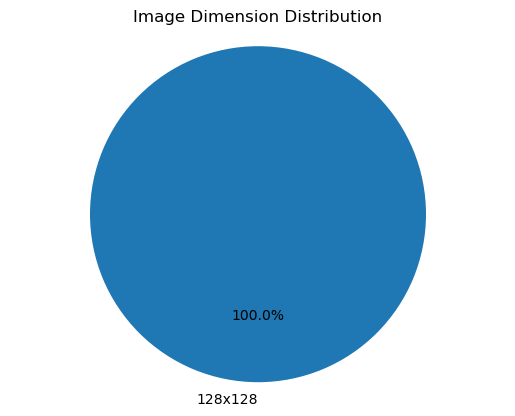

In [45]:
def count_image_dimensions(folder_path):
    dimensions = []
    for file in os.listdir(folder_path):
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            img = cv2.imread(os.path.join(folder_path, file))
            if img is not None:
                dimensions.append(f"{img.shape[1]}x{img.shape[0]}")  # Width x Height
    return Counter(dimensions)

# Function to plot pie chart
def plot_pie_chart(dimension_counts):
    labels = list(dimension_counts.keys())
    sizes = list(dimension_counts.values())
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title("Image Dimension Distribution")
    plt.axis('equal')  # Make the pie chart circular
    plt.show()

# Example usage
folder_path = r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Padded Dataset"
dimension_counts = count_image_dimensions(folder_path)
plot_pie_chart(dimension_counts)

In [2]:
import os
import shutil
import re

dataset_path = r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Padded Dataset"
output_path = r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Padded Dataset_reorganized"

pattern = r'(\d+)'

os.makedirs(output_path, exist_ok=True)

for filename in os.listdir(dataset_path):
    if filename.endswith((".jpg", ".png")):
        match = re.search(pattern, filename)
        if match:
            label = match.group(1)  # extract label string, e.g., '23'
            class_folder = os.path.join(output_path, label)
            os.makedirs(class_folder, exist_ok=True)

            src_file = os.path.join(dataset_path, filename)
            dst_file = os.path.join(class_folder, filename)

            shutil.copy2(src_file, dst_file)  # copy the image file
        else:
            print(f"Skipping file with no label: {filename}")

print("Dataset reorganized into subfolders by class.")


Dataset reorganized into subfolders by class.


In [2]:
import os
import re
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Step 0: Define your dataset root folder
dataset_path = r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Padded Dataset"

# Step 1: Reorganize dataset into class subfolders based on numeric label in filename
print("Reorganizing dataset into class subfolders...")

pattern = r'\d+'  # Adjust if your labels have a different pattern

for filename in os.listdir(dataset_path):
    if filename.lower().endswith(('.jpg', '.png')):
        match = re.search(pattern, filename)
        if match:
            label = match.group()
            label_folder = os.path.join(dataset_path, label)
            if not os.path.exists(label_folder):
                os.makedirs(label_folder)
            src = os.path.join(dataset_path, filename)
            dst = os.path.join(label_folder, filename)
            shutil.move(src, dst)
        else:
            print(f"Warning: Label not found in filename: {filename}")

print("Reorganization done.\n")

# Step 2: Create ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Step 3: Create train and validation generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

print(f"Training samples: {train_generator.samples}, Classes: {train_generator.num_classes}")
print(f"Validation samples: {validation_generator.samples}, Classes: {validation_generator.num_classes}")

# Step 4: Build the VGG16 transfer learning model
num_classes = train_generator.num_classes

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in vgg_base.layers:
    layer.trainable = False

x = Flatten()(vgg_base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=vgg_base.input, outputs=output)

model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Step 5: Train the model
epochs = 20  # adjust as needed

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1
)

# Step 6: Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator, verbose=0)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")

# Optional: Save the trained model
# model.save('vgg16_transfer_learning_model.h5')
# print("Model saved as 'vgg16_transfer_learning_model.h5'")


Reorganizing dataset into class subfolders...
Reorganization done.

Found 77 images belonging to 45 classes.
Found 8 images belonging to 45 classes.
Training samples: 77, Classes: 45
Validation samples: 8, Classes: 45


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 45)             │         5,80

 Total params: 16,850,797 (64.28 MB)

 Trainable params: 2,136,109 (8.15 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.0069 - loss: 4.6815 - val_accuracy: 0.1250 - val_loss: 3.3233
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.0653 - loss: 3.8616 - val_accuracy: 0.3750 - val_loss: 3.1910
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.0925 - loss: 3.9735 - val_accuracy: 0.3750 - val_loss: 2.9607
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.1623 - loss: 3.6844 - val_accuracy: 0.2500 - val_loss: 3.1608
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.1433 - loss: 3.2984 - val_accuracy: 0.3750 - val_loss: 3.3484
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.1613 - loss: 3.1378 - val_accuracy: 0.5000 - val_loss: 3.2269
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.1083 - loss: 3.2339 - val_accuracy: 0.3750 - val_loss: 3.0392
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.2228 - loss: 2.9999 - val_accuracy: 0.5000 - val_loss:

DEBUGGING DATASET LOADING
Checking dataset path: C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Padded Dataset_reorganized
Path exists: True
Path is directory: True
Directory contains 45 items
Subdirectories: 45
Files: 0
It looks like your dataset might be organized in subfolders.
Subdirectories found: ['0', '1', '11', '12', '13', '14', '15', '16', '17', '18']

Trying subfolder-based loading...
Found 45 subdirectories: ['0', '1', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '5', '6', '7', '8', '9']
Processing folder '0' (label 0): 1 images
Processing folder '1' (label 1): 6 images
Processing folder '11' (label 11): 1 images
Processing folder '12' (label 12): 1 images
Processing folder '13' (label 13): 1 images
Processing folder '14' (label 14): 1 images
Processing folder '15' (label 15): 1 images

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,814,152 (64.14 MB)

 Trainable params: 2,099,464 (8.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Starting training...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1579 - loss: 2.6465 - val_accuracy: 0.1000 - val_loss: 2.5104
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.2632 - loss: 2.1673 - val_accuracy: 0.3000 - val_loss: 2.0561
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.3421 - loss: 1.6594 - val_accuracy: 0.5000 - val_loss: 1.5401
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.6579 - loss: 0.9678 - val_accuracy: 0.5000 - val_loss: 1.4863
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.6579 - loss: 0.9333 - val_accuracy: 0.2000 - val_loss: 1.5336
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.5789 - loss: 0.8502 - val_accuracy: 0.6000 - val_loss: 1.3731
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.7632 - loss: 0.5726 - val_accuracy: 0.6000 - val_loss: 1.3751
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.8421 - loss: 0.4163 - val_ac

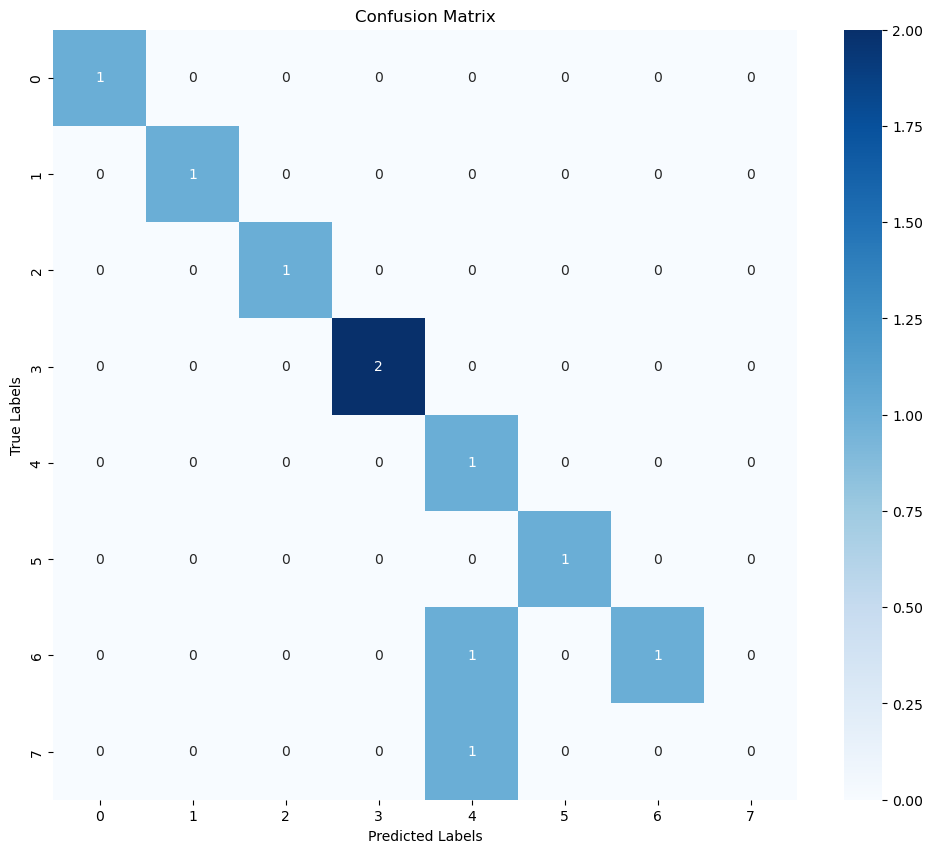

c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         1
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1

    accuracy                           0.80        10
   macro avg       0.79      0.81      0.77        10
weighted avg       0.83      0.80      0.78        10

Model saved successfully!


In [3]:
import os
import re
import cv2
import numpy as np
import collections
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# 1. Enhanced Preprocessing Function
def preprocess_image(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            return None
        
        # Convert BGR to RGB (cv2 loads in BGR by default)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (128, 128))  # Resize for VGG16
        image = image / 255.0  # Normalize to [0, 1]
        return image
    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")
        return None

# 2. Enhanced Load Dataset Function with Better Debugging
def load_dataset(dataset_path):
    images, labels = [], []
    
    # Check if path exists
    if not os.path.exists(dataset_path):
        print(f"ERROR: Dataset path does not exist: {dataset_path}")
        return np.array([]), np.array([])
    
    # Get all files in directory
    try:
        files = os.listdir(dataset_path)
        print(f"Total files in dataset folder: {len(files)}")
        
        if len(files) == 0:
            print("ERROR: No files found in the dataset directory")
            return np.array([]), np.array([])
        
        # Show first few filenames for debugging
        print(f"Sample filenames: {files[:10]}")
        
    except Exception as e:
        print(f"ERROR: Cannot read directory {dataset_path}: {str(e)}")
        return np.array([]), np.array([])
    
    # Count file types
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif']
    image_files = []
    other_files = []
    
    for file_name in files:
        file_ext = os.path.splitext(file_name.lower())[1]
        if file_ext in image_extensions:
            image_files.append(file_name)
        else:
            other_files.append(file_name)
    
    print(f"Image files found: {len(image_files)}")
    print(f"Non-image files: {len(other_files)}")
    
    if len(image_files) == 0:
        print("ERROR: No image files found with supported extensions (.jpg, .jpeg, .png, .bmp, .tiff, .tif)")
        return np.array([]), np.array([])
    
    # Pattern to extract numeric labels - made more flexible
    patterns = [
        r'(\d+)',           # Any digits
        r'class_(\d+)',     # class_123
        r'label_(\d+)',     # label_123
        r'(\d+)_',          # 123_anything
        r'_(\d+)',          # anything_123
    ]
    
    successful_loads = 0
    failed_loads = 0
    
    for file_name in image_files:
        file_path = os.path.join(dataset_path, file_name)
        
        # Try to load and preprocess image
        image = preprocess_image(file_path)
        if image is None:
            failed_loads += 1
            continue
        
        # Try different patterns to extract label
        label_found = False
        for pattern in patterns:
            match = re.search(pattern, file_name)
            if match:
                try:
                    label = int(match.group(1) if match.lastindex else match.group())
                    images.append(image)
                    labels.append(label)
                    successful_loads += 1
                    if successful_loads <= 5:  # Show first 5 for debugging
                        print(f"✓ Loaded: {file_name} → label {label}")
                    label_found = True
                    break
                except (ValueError, IndexError) as e:
                    continue
        
        if not label_found:
            print(f"✗ No label found in filename: {file_name}")
            failed_loads += 1
    
    print(f"\nSummary:")
    print(f"Successfully loaded: {successful_loads} images")
    print(f"Failed to load: {failed_loads} images")
    
    if successful_loads == 0:
        print("\nERROR: No images were successfully loaded!")
        print("Possible issues:")
        print("1. Image files are corrupted")
        print("2. Filename pattern doesn't contain numeric labels")
        print("3. Path permissions issue")
        print("\nSample filenames for manual inspection:")
        for i, fname in enumerate(image_files[:10]):
            print(f"  {i+1}. {fname}")
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# 3. Alternative dataset loading for different folder structures
def load_dataset_from_subfolders(base_path):
    """
    Alternative loader if your dataset is organized in subfolders
    where each subfolder name represents the class label
    """
    images, labels = [], []
    
    if not os.path.exists(base_path):
        print(f"ERROR: Base path does not exist: {base_path}")
        return np.array([]), np.array([])
    
    # Get all subdirectories
    subdirs = [d for d in os.listdir(base_path) 
               if os.path.isdir(os.path.join(base_path, d))]
    
    print(f"Found {len(subdirs)} subdirectories: {subdirs}")
    
    for subdir in subdirs:
        try:
            # Try to extract label from folder name
            label = int(re.search(r'\d+', subdir).group())
            subdir_path = os.path.join(base_path, subdir)
            
            # Get all image files in this subdirectory
            files = os.listdir(subdir_path)
            image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
            
            print(f"Processing folder '{subdir}' (label {label}): {len(image_files)} images")
            
            for img_file in image_files:
                img_path = os.path.join(subdir_path, img_file)
                image = preprocess_image(img_path)
                if image is not None:
                    images.append(image)
                    labels.append(label)
            
        except (ValueError, AttributeError):
            print(f"Could not extract label from folder name: {subdir}")
            continue
    
    return np.array(images), np.array(labels)

# MAIN EXECUTION
if __name__ == "__main__":
    # Dataset path - UPDATE THIS TO YOUR ACTUAL PATH
    dataset_path = r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Padded Dataset_reorganized"
    
    print("="*60)
    print("DEBUGGING DATASET LOADING")
    print("="*60)
    
    print(f"Checking dataset path: {dataset_path}")
    print(f"Path exists: {os.path.exists(dataset_path)}")
    
    if os.path.exists(dataset_path):
        print(f"Path is directory: {os.path.isdir(dataset_path)}")
        try:
            contents = os.listdir(dataset_path)
            print(f"Directory contains {len(contents)} items")
            
            # Check if it's organized in subfolders
            subdirs = [item for item in contents if os.path.isdir(os.path.join(dataset_path, item))]
            files = [item for item in contents if os.path.isfile(os.path.join(dataset_path, item))]
            
            print(f"Subdirectories: {len(subdirs)}")
            print(f"Files: {len(files)}")
            
            if len(subdirs) > 0:
                print("It looks like your dataset might be organized in subfolders.")
                print("Subdirectories found:", subdirs[:10])
                print("\nTrying subfolder-based loading...")
                X, y = load_dataset_from_subfolders(dataset_path)
            else:
                print("Trying direct file loading...")
                X, y = load_dataset(dataset_path)
                
        except Exception as e:
            print(f"Error accessing directory: {str(e)}")
            X, y = np.array([]), np.array([])
    else:
        X, y = np.array([]), np.array([])
    
    print("="*60)
    
    if len(X) == 0:
        print("❌ NO IMAGES LOADED!")
        print("\nTroubleshooting steps:")
        print("1. Verify the dataset path is correct")
        print("2. Check file permissions")
        print("3. Ensure image files have proper extensions")
        print("4. Make sure filenames contain numeric labels")
        print("5. Try running this script from the same drive as your dataset")
        
        # Try to provide more specific guidance
        if os.path.exists(dataset_path):
            print(f"\n📁 Contents of {dataset_path}:")
            try:
                for i, item in enumerate(os.listdir(dataset_path)[:20]):
                    item_path = os.path.join(dataset_path, item)
                    if os.path.isdir(item_path):
                        print(f"  📁 {item}/")
                    else:
                        print(f"  📄 {item}")
                    if i >= 19:
                        print("  ... (showing first 20 items)")
                        break
            except Exception as e:
                print(f"Cannot list directory contents: {e}")
        
        exit(1)
    
    print(f"✅ Successfully loaded {len(X)} images!")
    print(f"Image shape: {X[0].shape}")
    print(f"Labels range: {min(y)} to {max(y)}")
    
    # Continue with the rest of your original code...
    
    # Map labels to indices starting from zero
    unique_labels = np.unique(y)
    print(f"Number of unique classes: {len(unique_labels)}")
    print(f"Class labels: {sorted(unique_labels)}")
    
    label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
    y_indices = np.array([label_to_index[label] for label in y])

    # Filter classes with at least 2 samples for train/test split
    counter = collections.Counter(y_indices)
    print("Samples per class:", dict(sorted(counter.items())))

    classes_to_remove = [cls for cls, count in counter.items() if count < 2]
    if len(classes_to_remove) > 0:
        print(f"Removing {len(classes_to_remove)} classes with <2 samples:", classes_to_remove)
        
        mask = np.isin(y_indices, classes_to_remove, invert=True)
        X_filtered = X[mask]
        y_filtered = y_indices[mask]

        unique_labels_filtered = np.unique(y_filtered)
        print(f"Classes after filtering: {len(unique_labels_filtered)}")

        # Remap labels after filtering
        label_to_index_filtered = {label: idx for idx, label in enumerate(unique_labels_filtered)}
        y_indices_filtered = np.array([label_to_index_filtered[label] for label in y_filtered])
    else:
        X_filtered = X
        y_indices_filtered = y_indices
        unique_labels_filtered = unique_labels

    # One-hot encode
    num_classes_filtered = len(unique_labels_filtered)
    y_one_hot_filtered = to_categorical(y_indices_filtered, num_classes=num_classes_filtered)

    print(f"Final dataset: {len(X_filtered)} images, {num_classes_filtered} classes")

    # Split dataset (stratified)
    X_train, X_val, y_train, y_val = train_test_split(
        X_filtered, y_one_hot_filtered, test_size=0.2, random_state=42, stratify=y_indices_filtered
    )

    print(f"Training set: {len(X_train)} samples")
    print(f"Validation set: {len(X_val)} samples")

    # Load pre-trained VGG16 base
    print("Loading VGG16 model...")
    vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    # Freeze base layers
    for layer in vgg_base.layers:
        layer.trainable = False

    # Add custom layers
    x = Flatten()(vgg_base.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes_filtered, activation='softmax')(x)

    model = Model(inputs=vgg_base.input, outputs=output)

    # Compile
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print("Model compiled successfully!")
    model.summary()

    # Train
    print("Starting training...")
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=40,
        validation_data=(X_val, y_val),
        verbose=1
    )

    # Evaluate
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation Accuracy: {val_accuracy:.4f}")

    # Confusion Matrix
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)

    conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(num_classes_filtered), yticklabels=range(num_classes_filtered))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

    # Save model
    model.save('bangla_sign_language_vgg16_model.h5')
    print("Model saved successfully!")

In [6]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import os
import cv2
import re
from tensorflow.keras.utils import to_categorical

# # 1. Load Dataset
# dataset_path = '/content/drive/MyDrive/Project dataset/Padded Dataset'  # Path to the folder containing images

# images = []
# labels = []

# # Define a regex pattern to extract the numeric part of the filename
# pattern = r'\d+'

# for filename in os.listdir(dataset_path):
#     if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
#         img_path = os.path.join(dataset_path, filename)
#         img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

#         # Extract label from filename using regex
#         match = re.search(pattern, filename)
#         if match:
#             label = int(match.group())  # Convert the matched numeric string to an integer
#             # Adjust labels to start from 0 if necessary:
#             label = label - 1  # Subtract 1 from the label

#             # Check if label is within valid range
#             if label >= 47:
#                 print(f"Warning: Label {label} is out of range. Skipping image: {filename}")
#                 continue  # Skip this image

#             # Only append image data if the label is valid
#             img = img / 255.0  # Normalize pixel values to the range [0, 1]
#             img = img.reshape(-1)  # Flatten the image into a 1D array
#             images.append(img) # Append the image data here
#             labels.append(label)
#         else:
#             print(f"Warning: Could not extract label from filename: {filename}")  # Handle cases where regex doesn't find a match

# X = np.array(images)
# y = np.array(labels)

# # ... (Rest of your code remains the same)
# # 2. Split Dataset into Train and Test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 3. One-hot encode labels for multi-class classification
# num_classes = 47 # Changed to reflect the actual number of classes after adjusting label to start from 0

# y_train = to_categorical(y_train, num_classes=num_classes)
# y_test = to_categorical(y_test, num_classes=num_classes)

# # 4. Define the Model (Modified for Multi-class Classification)
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer with softmax for multi-class
# ])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy loss

# # 5. Train the Model
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2) # Increased epochs

# # 6. Evaluate on Test Data
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels
# y_true_classes = np.argmax(y_test, axis=1)  # Get true class labels
# test_accuracy = accuracy_score(y_true_classes, y_pred_classes)

# print(f"Test Accuracy: {test_accuracy:.2f}")

#pending

In [7]:
pip install --upgrade tensorflow tensorflow-federated tensorflow-estimator


  Using cached tensorflow_federated-0.48.0-py2.py3-none-any.whl.metadata (3.9 kB)
  Using cached attrs-21.4.0-py2.py3-none-any.whl.metadata (9.8 kB)
  Using cached cachetools-3.1.1-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached dm_tree-0.1.7-cp310-cp310-win_amd64.whl.metadata (1.9 kB)
  Using cached dp_accounting-0.3.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached farmhashpy-0.4.0.tar.gz (98 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of tensorflow-federated to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow_federated-0.47.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached tensorflow_federated-0.46.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached tensorflow_federated-0.45.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached tensorflow_federated-0.44.0-py2.py3-none-any.whl.metadata (3.8 kB)
  U

In [ ]:
pip list | grep tensorflow


tensorflow                            2.14.1
tensorflow-datasets                   4.9.8
tensorflow_decision_forests           1.11.0
tensorflow-estimator                  2.14.0
tensorflow_federated                  0.84.0
tensorflow-hub                        0.16.1
tensorflow-io-gcs-filesystem          0.37.1
tensorflow-metadata                   1.17.1
tensorflow-model-optimization         0.7.5
tensorflow_privacy                    0.9.0
tensorflow-probability                0.22.1
tensorflow-text                       2.18.1


In [ ]:
pip uninstall tensorflow tensorflow-estimator tensorflow-federated
pip install tensorflow==2.10.0 tensorflow-estimator==2.10.0 tensorflow-federated==0.38.0

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Configuration
dataset_path = r"C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Padded Dataset_reorganized"
max_samples_per_class = 20  # Limit samples per class for testing

print("=== NESTED DATASET LOADER ===")
print(f"Dataset path: {dataset_path}")

# Step 1: Explore the nested structure
print("\n1. Dataset Structure Analysis:")
if not os.path.exists(dataset_path):
    print(f"❌ ERROR: Directory does not exist!")
    exit()

# Get all subdirectories (class folders)
class_folders = []
for item in os.listdir(dataset_path):
    item_path = os.path.join(dataset_path, item)
    if os.path.isdir(item_path):
        class_folders.append(item)

class_folders.sort(key=lambda x: int(x) if x.isdigit() else float('inf'))
print(f"Found {len(class_folders)} class folders:")
print(f"Class folders: {class_folders}")

if len(class_folders) == 0:
    print("❌ No class folders found!")
    exit()

# Step 2: Explore images in each class folder
print("\n2. Images in Each Class:")
total_images = 0
class_image_counts = {}

for class_folder in class_folders[:5]:  # Check first 5 classes
    class_path = os.path.join(dataset_path, class_folder)
    image_files = []
    
    for file in os.listdir(class_path):
        if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif')):
            image_files.append(file)
    
    class_image_counts[class_folder] = len(image_files)
    total_images += len(image_files)
    
    print(f"  Class {class_folder}: {len(image_files)} images")
    if len(image_files) > 0:
        print(f"    Sample files: {image_files[:3]}")

print(f"Total images found (first 5 classes): {total_images}")

if total_images == 0:
    print("❌ No images found in class folders!")
    exit()

# Step 3: Load dataset from nested structure
print(f"\n3. Loading Dataset (max {max_samples_per_class} per class):")
images = []
labels = []
loaded_per_class = {}

for class_folder in class_folders:
    try:
        class_label = int(class_folder)
        class_path = os.path.join(dataset_path, class_folder)
        
        # Get all image files in this class folder
        image_files = []
        for file in os.listdir(class_path):
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif')):
                image_files.append(file)
        
        # Load images from this class (limited number)
        loaded_count = 0
        for image_file in image_files:
            if loaded_count >= max_samples_per_class:
                break
                
            try:
                img_path = os.path.join(class_path, image_file)
                img = cv2.imread(img_path)
                
                if img is not None:
                    # Resize and normalize
                    img = cv2.resize(img, (128, 128))
                    img = img.astype(np.float32) / 255.0
                    
                    images.append(img)
                    labels.append(class_label)
                    loaded_count += 1
                
            except Exception as e:
                print(f"    Error loading {image_file}: {e}")
        
        loaded_per_class[class_folder] = loaded_count
        if loaded_count > 0:
            print(f"  Class {class_folder}: loaded {loaded_count} images")
            
    except ValueError:
        print(f"  Skipping non-numeric folder: {class_folder}")
    except Exception as e:
        print(f"  Error processing class {class_folder}: {e}")

print(f"\nLoading Summary:")
total_loaded = len(images)
print(f"  Total images loaded: {total_loaded}")
print(f"  Images per class: {loaded_per_class}")

if total_loaded == 0:
    print("❌ No images were loaded!")
    exit()

# Convert to arrays
X = np.array(images, dtype=np.float32)
y = np.array(labels, dtype=np.int32)

print(f"\n4. Dataset Summary:")
print(f"  Images shape: {X.shape}")
print(f"  Labels shape: {y.shape}")
print(f"  Memory usage: {X.nbytes / (1024*1024):.1f} MB")
print(f"  Unique classes: {len(np.unique(y))}")
print(f"  Label range: {np.min(y)} to {np.max(y)}")
print(f"  Classes found: {sorted(np.unique(y))}")

# Show class distribution
unique_labels, counts = np.unique(y, return_counts=True)
print(f"\nClass Distribution:")
for label, count in zip(unique_labels, counts):
    print(f"  Class {label}: {count} samples")

# Step 5: Test train-test split
print(f"\n5. Train-Test Split:")
try:
    # Check if we have enough samples for stratified split
    min_samples = np.min(counts)
    if min_samples >= 2:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        print(f"  ✅ Stratified split successful!")
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        print(f"  ✅ Random split successful (some classes have <2 samples)")
    
    print(f"  Train: {X_train.shape}, Test: {X_test.shape}")
    
except Exception as e:
    print(f"  ❌ Split failed: {e}")

print(f"\n🎉 SUCCESS! Dataset loaded successfully!")
print(f"Ready for model training with {total_loaded} samples across {len(np.unique(y))} classes")

# Optional: Show file structure for reference
print(f"\nDataset Structure:")
print(f"  {dataset_path}/")
for class_folder in sorted(class_folders, key=lambda x: int(x) if x.isdigit() else 0)[:10]:
    count = loaded_per_class.get(class_folder, 0)
    print(f"  ├── {class_folder}/ ({count} images loaded)")
if len(class_folders) > 10:
    print(f"  └── ... and {len(class_folders)-10} more classes")

=== NESTED DATASET LOADER ===
Dataset path: C:\Users\MSC008\Desktop\707\Project Dataset\Project Dataset\Padded Dataset_reorganized

1. Dataset Structure Analysis:
Found 45 class folders:
Class folders: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46']

2. Images in Each Class:
  Class 0: 1 images
    Sample files: ['0_1.jpg']
  Class 1: 6 images
    Sample files: ['1_2.jpg', 'aug_1_2_0_2549.jpg', 'aug_1_2_0_6527.jpg']
  Class 2: 1 images
    Sample files: ['2_3.jpg']
  Class 3: 1 images
    Sample files: ['3_4.jpg']
  Class 4: 1 images
    Sample files: ['4_5.jpg']
Total images found (first 5 classes): 10

3. Loading Dataset (max 20 per class):
  Class 0: loaded 1 images
  Class 1: loaded 6 images
  Class 2: loaded 1 images
  Class 3: loaded 1 images
  Class 4: loaded 1 images
 

In [2]:
!pip install jax==0.4.10
!pip install cachetools==4.2.1
!pip install dp_accounting
!pip install tensorflow_privacy
!pip install tensorflow_compression
!pip install tensorflow_model_optimization
!pip install pyfarmhash
!pip install google-vizier

     ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
     ------------------------ --------------- 0.8/1.3 MB 8.5 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 9.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for jax: filename=jax-0.4.10-py3-none-any.whl size=1480732 sha256=6ba81cdeef357de1328fe5e26bd3daafad8157e07e3a41d85106e29d2ff2c7fd
  Stored in directory: c:\users\msc008\appdata\local\pip\cache\wheels\2f\04\51\ebc9c5225f0a0df1e56c231c1f4c9b7afd3e024ebb492eed99
Successfully built jax
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.5.2
    Uninstalling cachetools-5.5.2:
      Successfully unin

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.3.2 requires huggingface-hub>=0.24.0, but you have huggingface-hub 0.12.0 which is incompatible.
tensorflow-datasets 4.9.8 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 3.19.6 which is incompatible.


   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   --------------------------- ------------ 4.7/6.9 MB 23.7 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 28.3 MB/s eta 0:00:00

  Attempting uninstall: dm-tree

    Found existing installation: dm-tree 0.1.9

    Uninstalling dm-tree-0.1.9:

      Successfully uninstalled dm-tree-0.1.9

  Attempting uninstall: packaging

    Found existing installation: packaging 24.2

    Uninstalling packaging-24.2:

      Successfully uninstalled packaging-24.2

   -------------------- ------------------- 3/6 [tensorflow-probability]
   -------------------- ------------------- 3/6 [tensorflow-probability]
   -------------------- ------------------- 3/6 [tensorflow-probability]
   -------------------- ------------------- 3/6 [tensorflow-probability]
   -------------------- ------------------- 3/6 [tensorflow-probability]
   -------------------- ------------------- 3/6 [tensorflow-probability]
   ----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.3.2 requires huggingface-hub>=0.24.0, but you have huggingface-hub 0.12.0 which is incompatible.
tensorflow-datasets 4.9.8 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tokenizers 0.19.1 requires huggingface_hub<1.0,>=0.16.4, but you have huggingface-hub 0.12.0 which is incompatible.
transformers 4.29.2 requires huggingface-hub<1.0,>=0.14.1, but you have huggingface-hub 0.12.0 which is incompatible.
transformers 4.29.2 requires tokenizers!=0.11.3,<0.14,>=0.11.1, but you have tokenizers 0.19.1 which is incompatible.
ERROR: Could not find a version that satisfies the requirement tensorflow_compression (from versions: none)
ERROR: No matching distribution found for tensorflow_compression


   ---------------------------------------- 0.0/801.4 kB ? eta -:--:--
   ---------------------------------------  786.4/801.4 kB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 801.4/801.4 kB 8.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 29.8 MB/s eta 0:00:00

  Attempting uninstall: protobuf

    Found existing installation: protobuf 3.19.6

    Uninstalling protobuf-3.19.6:

   ---------------------------------------- 0/6 [protobuf]
   ---------------------------------------- 0/6 [protobuf]
   ---------------------------------------- 0/6 [protobuf]
   ---------------------------------------- 0/6 [protobuf]
   ---------------------------------------- 0/6 [protobuf]
   ---------------------------------------- 0/6 [protobuf]
   ---------------------------------------- 0/6 [protobuf]
   ---------------------------------------- 0/6 [protobuf]
      Successfully uninstalled 

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 6.31.0 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 6.31.0 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 6.31.0 which is incompatible.


In [1]:
!pip install --no-deps tensorflow-federated



  Using cached tensorflow_federated-0.48.0-py2.py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/42.8 MB 5.7 MB/s eta 0:00:08
   ----- ---------------------------------- 6.3/42.8 MB 29.7 MB/s eta 0:00:02
   ----- ---------------------------------- 6.3/42.8 MB 29.7 MB/s eta 0:00:02
   ------- -------------------------------- 8.4/42.8 MB 14.9 MB/s eta 0:00:03
   ------- -------------------------------- 8.4/42.8 MB 14.9 MB/s eta 0:00:03
   ------- -------------------------------- 8.4/42.8 MB 14.9 MB/s eta 0:00:03
   ------- -------------------------------- 8.4/42.8 MB 14.9 MB/s eta 0:00:03
   ---------- ----------------------------- 11.5/42.8 MB 7.6 MB/s eta 0:00:05
   ---------- ----------------------------- 11.5/42.8 MB 7.6 MB/s eta 0:00:05
   ---------- ----------------------------- 11.5/42.8 MB 7.6 MB/s eta 0:00:05
   ---------- ----------------------------- 11.5/42.8 MB 7.6 MB/s eta

In [2]:
!pip install tensorflow-federated



  Using cached attrs-21.4.0-py2.py3-none-any.whl.metadata (9.8 kB)
  Using cached cachetools-3.1.1-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached dm_tree-0.1.7-cp310-cp310-win_amd64.whl.metadata (1.9 kB)
  Using cached dp_accounting-0.3.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached farmhashpy-0.4.0.tar.gz (98 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of tensorflow-federated to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow_federated-0.47.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached tensorflow_federated-0.46.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached tensorflow_federated-0.45.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached tensorflow_federated-0.44.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached tensorflow_federated-0.43.0-py2.py3-none-any.whl.metadata (3.8 kB)
  U

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 35, in <module>
        File "C:\Users\MSC008\AppData\Local\Temp\pip-install-21n9y8ym\absl-py_76ffa05ebd9d47d19885c8f6615c68d7\setup.py", line 34, in <module>
          raise RuntimeError('Python version 2.7 or 3.4+ is required.')
      RuntimeError: Python version 2.7 or 3.4+ is required.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
import os
os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'


In [7]:
import tensorflow_federated as tff
from tensorflow_federated import version
print(f"TensorFlow Federated version: {version.__version__}")

TensorFlow Federated version: 0.48.0


In [8]:
import pkg_resources
tff_version = pkg_resources.get_distribution("tensorflow-federated").version
print(f"TensorFlow Federated version: {tff_version}")

TensorFlow Federated version: 0.1.0


C:\Users\MSC008\AppData\Local\Temp\ipykernel_11612\684112800.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [9]:
import tensorflow_federated as tff
from importlib.metadata import version
tff_version = version('tensorflow-federated')
print(f"TensorFlow Federated version: {tff_version}")

TensorFlow Federated version: 0.1.0


In [1]:
# Check current environment
import sys
import os
print(f"Python executable: {sys.executable}")
print(f"Environment: {os.getenv('CONDA_DEFAULT_ENV')}")

# Check installed packages
import pkg_resources
installed_packages = [d.project_name for d in pkg_resources.working_set]
required_packages = ['numpy', 'sklearn', 'tensorflow', 'opencv-python']

for package in required_packages:
    if any(package in p for p in installed_packages):
        print(f"✓ {package} is installed")
    else:
        print(f"✗ {package} is NOT installed")

Python executable: c:\Users\MSC008\miniconda3\envs\py310\python.exe
Environment: py310
✓ numpy is installed
✗ sklearn is NOT installed
✓ tensorflow is installed
✓ opencv-python is installed


C:\Users\MSC008\AppData\Local\Temp\ipykernel_6572\142338811.py:8: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [ ]:
import sys
import os

print("--- Diagnosing TensorFlow Import Issue ---")

try:
    import tensorflow as tf
    print(f"Successfully imported 'tensorflow'.")

    if hasattr(tf, '__file__'):
        tf_source_path = os.path.abspath(tf.__file__)
        print(f"  Source path of imported 'tensorflow': {tf_source_path}")
        print(f"  Directory containing 'tensorflow': {os.path.dirname(tf_source_path)}")

        current_dir = os.getcwd()
        if tf_source_path.startswith(current_dir) and not ("site-packages" in tf_source_path or "dist-packages" in tf_source_path):
             print("\n!!! WARNING: TensorFlow is being imported from your CURRENT DIRECTORY or a subfolder within it. !!!")
             print("This is the most common cause of the AttributeError.")
             print(f"Look for a file named '{os.path.join(current_dir, 'tensorflow.py')}' or a folder named '{os.path.join(current_dir, 'tensorflow/')}'.")
             print("You must rename or delete it.")
        elif "site-packages" in tf_source_path or "dist-packages" in tf_source_path:
            print("  TensorFlow appears to be imported from a standard Python installation path.")
            print("  This suggests the installation might be corrupted or you're using the wrong environment.")
        else:
            print("  TensorFlow is imported from an unexpected path.")

    else:
        print("  The imported 'tensorflow' module does not have a '__file__' attribute.")
        print("  This strongly suggests it's not the real TensorFlow library (e.g., it might be an empty local file).")

    try:
        print(f"\nTensorFlow version: {tf.__version__}")
        print("TensorFlow is installed and working correctly (version detected).")
    except AttributeError:
        print("\nError: The imported 'tensorflow' module DOES NOT HAVE a '__version__' attribute.")
        print("This confirms the issue: you're importing something called 'tensorflow' but it's not the full library.")


except ImportError:
    print("Error: Could not import 'tensorflow'. TensorFlow is not installed in this environment.")

print("\n--- Python's Import Path (sys.path) ---")
for i, p in enumerate(sys.path):
    print(f"  {i}: {p}")

print("\n--- Current Working Directory ---")
print(f"  {os.getcwd()}")
print("-------------------------------------")

--- Diagnosing TensorFlow Import Issue ---
Successfully imported 'tensorflow'.
  Source path of imported 'tensorflow': c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\tensorflow\__init__.py
  Directory containing 'tensorflow': c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\tensorflow
  TensorFlow appears to be imported from a standard Python installation path.
  This suggests the installation might be corrupted or you're using the wrong environment.

TensorFlow version: 2.19.0
TensorFlow is installed and working correctly (version detected).

--- Python's Import Path (sys.path) ---
  0: c:\Users\MSC008\miniconda3\envs\py310\python310.zip
  1: c:\Users\MSC008\miniconda3\envs\py310\DLLs
  2: c:\Users\MSC008\miniconda3\envs\py310\lib
  3: c:\Users\MSC008\miniconda3\envs\py310
  4: 
  5: c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages
  6: c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\win32
  7: c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\win3

In [4]:
!pip install jax==0.4.10
!pip install cachetools==4.2.1
!pip install dp_accounting
!pip install tensorflow_privacy
!pip install tensorflow_compression
!pip install tensorflow_model_optimization
!pip install pyfarmhash
!pip install google-vizier

     ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
     ------------------------ --------------- 0.8/1.3 MB 11.2 MB/s eta 0:00:01
     ---------------------------------------- 1.3/1.3 MB 10.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for jax: filename=jax-0.4.10-py3-none-any.whl size=1480732 sha256=f9350f1eeb85a3f843040d981fde998befbef518a19c7df90f7cc64bc2bf2c81
  Stored in directory: c:\users\msc008\appdata\local\pip\cache\wheels\2f\04\51\ebc9c5225f0a0df1e56c231c1f4c9b7afd3e024ebb492eed99
Successfully built jax


   ---------------------------------------- 0.0/536.2 kB ? eta -:--:--
   ---------------------------------------- 536.2/536.2 kB 4.4 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [mpmath]
   -------------------- ------------------- 1/2 [dp_accounting]
   ---------------------------------------- 2/2 [dp_accounting]



   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ------------- -------------------------- 5.2/15.8 MB 26.6 MB/s eta 0:00:01
   ---------------------------------------- 15.8/15.8 MB 49.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 6.9/6.9 MB 105.6 MB/s eta 0:00:00

  Attempting uninstall: numpy

    Found existing installation: numpy 2.1.3

    Uninstalling numpy-2.1.3:

   ---------------------------------------- 0/5 [numpy]
   ---------------------------------------- 0/5 [numpy]
   ---------------------------------------- 0/5 [numpy]
   ---------------------------------------- 0/5 [numpy]
   ---------------------------------------- 0/5 [numpy]
      Successfully uninstalled numpy-2.1.3
   ---------------------------------------- 0/5 [numpy]
   ---------------------------------------- 0/5 [numpy]
   ---------------------------------------- 0/5 [numpy]
   -----------------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.18.1 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 3.10.0 which is incompatible.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.4 which is incompatible.
tensorflow-intel 2.13.0 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.19.0 which is incompatible.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.13.2 which is incompatible.
ERROR: Could not find a version that satisfies the requirement tensorflow_compression (from versions: none)
ERROR: No matching distribution found for tensorflow_compression


   ---------------------------------------- 0.0/801.4 kB ? eta -:--:--
   -------------------------- ------------- 524.3/801.4 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 801.4/801.4 kB 8.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 19.7 MB/s eta 0:00:00

   ---------------- ----------------------- 2/5 [googleapis-common-protos]
   ------------------------ --------------- 3/5 [sqlalchemy]
   ------------------------ --------------- 3/5 [sqlalchemy]
   ------------------------ --------------- 3/5 [sqlalchemy]
   ------------------------ --------------- 3/5 [sqlalchemy]
   -------------------------------- ------- 4/5 [google-vizier]
   -------------------------------- ------- 4/5 [google-vizier]
   -------------------------------- ------- 4/5 [google-vizier]
   ---------------------------------------- 5/5 [google-vizier]



In [5]:
!pip install --no-deps tensorflow-federated



   ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/42.8 MB 5.6 MB/s eta 0:00:08
   ------------ --------------------------- 12.8/42.8 MB 47.3 MB/s eta 0:00:01
   ---------------------------------- ----- 36.4/42.8 MB 79.9 MB/s eta 0:00:01
   ---------------------------------------- 42.8/42.8 MB 77.8 MB/s eta 0:00:00


In [ ]:
import os
import re
import cv2
import numpy as np
from typing import List, Tuple

def debug_dataset_loading():
    print("=" * 60)
    print("DATASET LOADING DIAGNOSTIC")
    print("=" * 60)
    
    possible_paths = [
        r'.\Project dataset\Project dataset\Padded Dataset',
        r'Project dataset\Project dataset\Padded Dataset',
        r'.\Padded Dataset',
        r'Padded Dataset',
        r'.\Project dataset\Project dataset\Original Dataset',
        r'Project dataset\Project dataset\Original Dataset',
        r'.\dataset',
        r'dataset'
    ]
    
    print("1. CHECKING PATHS:")
    dataset_path = None
    for i, path in enumerate(possible_paths):
        exists = os.path.exists(path)
        print(f"   {i+1}. {path:<35} {'EXISTS' if exists else 'NOT FOUND'}")
        if exists and dataset_path is None:
            dataset_path = path
    
    if dataset_path is None:
        print("\nNO DATASET PATH FOUND!")
        print("\nCurrent working directory:", os.getcwd())
        print("\nContents of current directory:")
        for item in os.listdir('.'):
            item_type = "DIR" if os.path.isdir(item) else "FILE"
            print(f"   {item_type} {item}")
        return None
    
    print(f"\nUSING DATASET PATH: {dataset_path}")
    
    print(f"\n2. CONTENTS OF {dataset_path}:")
    try:
        contents = os.listdir(dataset_path)
        if not contents:
            print("   Directory is empty!")
            return None
        
        image_files = []
        other_files = []
        directories = []
        
        for item in contents:
            item_path = os.path.join(dataset_path, item)
            if os.path.isdir(item_path):
                directories.append(item)
            elif item.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                image_files.append(item)
            else:
                other_files.append(item)
        
        print(f"   Directories: {len(directories)}")
        for d in directories[:5]:
            print(f"      - {d}")
        if len(directories) > 5:
            print(f"      ... and {len(directories) - 5} more")
        
        print(f"   Image files: {len(image_files)}")
        for img in image_files[:10]:
            print(f"      - {img}")
        if len(image_files) > 10:
            print(f"      ... and {len(image_files) - 10} more")
        
        print(f"   Other files: {len(other_files)}")
        for f in other_files[:5]:
            print(f"      - {f}")
        if len(other_files) > 5:
            print(f"      ... and {len(other_files) - 5} more")
        
        if not image_files:
            print("NO IMAGE FILES FOUND!")
            return None
        
    except Exception as e:
        print(f"   Error reading directory: {e}")
        return None
    
    print(f"\n3. TESTING IMAGE LOADING:")
    test_images = image_files[:5]
    
    for i, filename in enumerate(test_images):
        print(f"   Testing {i+1}/{len(test_images)}: {filename}")
        img_path = os.path.join(dataset_path, filename)
        
        if not os.path.exists(img_path):
            print(f"      File doesn't exist: {img_path}")
            continue
        
        file_size = os.path.getsize(img_path)
        print(f"      File size: {file_size} bytes")
        
        if file_size == 0:
            print(f"      File is empty!")
            continue
        
        try:
            img = cv2.imread(img_path)
            if img is None:
                try:
                    from PIL import Image
                    pil_img = Image.open(img_path)
                    img_array = np.array(pil_img)
                    if len(img_array.shape) == 3:
                        img = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
                except Exception as pil_e:
                    print(f"      PIL failed: {pil_e}")
            else:
                try:
                    resized = cv2.resize(img, (128, 128))
                except Exception as resize_e:
                    print(f"      Resizing failed: {resize_e}")
                    
        except Exception as e:
            print(f"      Loading error: {e}")
    
    print(f"\n4. TESTING LABEL EXTRACTION:")
    pattern = r'\d+'
    labels_found = []
    
    for filename in image_files[:10]:
        match = re.search(pattern, filename)
        if match:
            label = int(match.group())
            labels_found.append(label)
            print(f"   {filename:<30} → Label: {label}")
        else:
            print(f"   {filename:<30} → No label found")
    
    if labels_found:
        unique_labels = sorted(list(set(labels_found)))
        print(f"\n   Found labels: {unique_labels}")
        print(f"   Number of unique labels: {len(unique_labels)}")
    else:
        print(f"\n   No labels extracted from filenames!")
    
    return dataset_path, image_files

def test_image_loading_with_pil_fallback(dataset_path: str, image_files: List[str]) -> Tuple[np.ndarray, np.ndarray]:
    print(f"\n5. ATTEMPTING TO LOAD ALL IMAGES:")
    
    images = []
    labels = []
    pattern = r'\d+'
    
    raw_labels = []
    for filename in image_files:
        match = re.search(pattern, filename)
        if match:
            raw_labels.append(int(match.group()))
    
    if not raw_labels:
        print("No labels found in any filenames!")
        return None, None
    
    unique_raw_labels = sorted(list(set(raw_labels)))
    label_mapping = {raw_label: idx for idx, raw_label in enumerate(unique_raw_labels)}
    print(f"Label mapping: {label_mapping}")
    
    loaded_count = 0
    failed_count = 0
    
    for i, filename in enumerate(image_files):
        if i % 50 == 0:
            print(f"   Progress: {i}/{len(image_files)} ({i/len(image_files)*100:.1f}%)")
        
        img_path = os.path.join(dataset_path, filename)
        
        match = re.search(pattern, filename)
        if not match:
            continue
        
        raw_label = int(match.group())
        if raw_label not in label_mapping:
            continue
        
        mapped_label = label_mapping[raw_label]
        img = None
        
        try:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (128, 128))
                img = img / 255.0
        except:
            pass
        
        if img is None:
            try:
                from PIL import Image
                pil_img = Image.open(img_path)
                if pil_img.mode != 'RGB':
                    pil_img = pil_img.convert('RGB')
                pil_img = pil_img.resize((128, 128))
                img_array = np.array(pil_img, dtype=np.float32) / 255.0
                img = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
            except Exception as e:
                failed_count += 1
                if failed_count <= 5:
                    print(f"   Failed to load {filename}: {e}")
                continue
        
        if img is not None:
            images.append(img)
            labels.append(mapped_label)
            loaded_count += 1
        else:
            failed_count += 1
    
    print(f"\n   Successfully loaded: {loaded_count} images")
    print(f"   Failed to load: {failed_count} images")
    
    if loaded_count == 0:
        return None, None
    
    X = np.array(images, dtype=np.float32)
    y = np.array(labels)
    
    print(f"   Final dataset shape: X={X.shape}, y={y.shape}")
    print(f"   Label distribution: {np.bincount(y)}")
    
    return X, y

def main():
    print("RUNNING DATASET DIAGNOSTIC...")
    
    result = debug_dataset_loading()
    if result is None:
        return
    
    dataset_path, image_files = result
    
    X, y = test_image_loading_with_pil_fallback(dataset_path, image_files)
    
    if X is not None and y is not None:
        print(f"\nSUCCESS! Dataset loaded successfully:")
        print(f"   Images shape: {X.shape}")
        print(f"   Labels shape: {y.shape}")
        print(f"   Number of classes: {len(np.unique(y))}")
        print(f"   Labels range: {min(y)} to {max(y)}")
        
        print(f"\nDATASET STATISTICS:")
        print(f"   Total samples: {len(X)}")
        print(f"   Image dimensions: {X.shape[1:]}")
        print(f"   Data type: {X.dtype}")
        print(f"   Value range: [{X.min():.3f}, {X.max():.3f}]")
        
        unique_labels, counts = np.unique(y, return_counts=True)
        print(f"\nCLASS DISTRIBUTION:")
        for label, count in zip(unique_labels, counts):
            print(f"   Class {label}: {count} samples ({count/len(y)*100:.1f}%)")
        
    else:
        print(f"\nFAILED TO LOAD DATASET!")
        print(f"\nTROUBLESHOOTING TIPS:")
        print(f"   1. Check if images are corrupted")
        print(f"   2. Verify image file extensions")
        print(f"   3. Make sure images contain numbers in filenames")
        print(f"   4. Try using a different image format")
        print(f"   5. Check file permissions")

if __name__ == "__main__":
    main()


🔍 RUNNING DATASET DIAGNOSTIC...
DATASET LOADING DIAGNOSTIC
1. CHECKING PATHS:
   1. .\Project dataset\Project dataset\Padded Dataset ✅ EXISTS
   2. Project dataset\Project dataset\Padded Dataset ✅ EXISTS
   3. .\Padded Dataset                    ❌ NOT FOUND
   4. Padded Dataset                      ❌ NOT FOUND
   5. .\Project dataset\Project dataset\Original Dataset ✅ EXISTS
   6. Project dataset\Project dataset\Original Dataset ✅ EXISTS
   7. .\dataset                           ❌ NOT FOUND
   8. dataset                             ❌ NOT FOUND

✅ USING DATASET PATH: .\Project dataset\Project dataset\Padded Dataset

2. CONTENTS OF .\Project dataset\Project dataset\Padded Dataset:
   📁 Directories: 45
      - 0
      - 1
      - 11
      - 12
      - 13
      ... and 40 more
   🖼️  Image files: 2
      - Delete_47.jpeg
      - Space_48.jpeg
   📄 Other files: 0

3. TESTING IMAGE LOADING:
   Testing 1/2: Delete_47.jpeg
      📏 File size: 3930 bytes
      ✅ cv2 loaded successfully: (128, 12

c:\Users\MSC008\miniconda3\envs\py310\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


=== Custom Federated Learning for Image Classification (Fixed for Imbalanced Data) ===

✅ Found dataset at: .\Project dataset\Project dataset\Padded Dataset
📂 Loading images from directory structure: .\Project dataset\Project dataset\Padded Dataset
Found class folders: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
Class mapping: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 21: 19, 22: 20, 23: 21, 24: 22, 25: 23, 26: 24, 27: 25, 28: 26, 29: 27, 30: 28, 31: 29, 32: 30, 33: 31, 34: 32, 35: 33, 36: 34, 37: 35, 38: 36, 39: 37, 40: 38, 41: 39, 42: 40, 43: 41, 44: 42, 45: 43, 46: 44}
Loading images from class 0 (index 0)...
  Found 1 images in class 0
  ✅ Loaded 1 images from class 0
Loading images from class 1 (index 1)...
  Found 6 images in class 1
  ✅ Loaded 6 images from class 1

In [2]:
try:
    import tensorflow_federated as tff
    print(f"TensorFlow Federated version: {tff.__version__}")
    print("TensorFlow Federated is installed correctly.")
except ModuleNotFoundError as e:
    print(f"Error: {e}")
    print("Still missing a module.")
except AttributeError:
    print("Error: TensorFlow Federated was imported, but __version__ attribute is missing.")
    print("This usually means a corrupted TFF installation or a deeper dependency issue.")

Error: No module named 'attr'
Still missing a module.


In [ ]:
import sys
print(sys.executable)
print(sys.version)
c:\Users\MSC008\miniconda3\envs\py310\python.exe


c:\Users\MSC008\miniconda3\envs\py310\python.exe
3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]


In [ ]:
import os
import re
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
import tensorflow as tf

dataset_path = '/content/drive/MyDrive/Project dataset/Padded Dataset'

images = []
labels = []
pattern = r'\d+'

for filename in os.listdir(dataset_path):
    if filename.endswith((".jpg", ".png")):
        img_path = os.path.join(dataset_path, filename)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (128, 128))
        img = img / 255.0
        match = re.search(pattern, filename)
        if match:
            label = int(match.group()) - 1
            if label >= 47:
                continue
            images.append(img)
            labels.append(label)

X = np.array(images)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_classes = 47
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

vgg_base = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(128, 128, 3)))

for layer in vgg_base.layers:
    layer.trainable = False

x = Flatten()(vgg_base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=vgg_base.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Model Accuracy on Test Data: {accuracy:.2f}")


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import re

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    image = cv2.resize(image, (128, 128))
    image = image / 255.0
    return image

def load_dataset(dataset_path):
    images, labels = [], []
    pattern = r'\d+'
    for file_name in os.listdir(dataset_path):
        file_path = os.path.join(dataset_path, file_name)
        if file_name.lower().endswith((".jpg", ".png")):
            image = preprocess_image(file_path)
            if image is None:
                continue
            match = re.search(pattern, file_name)
            if match:
                label = int(match.group())
                images.append(image)
                labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

dataset_path = '/content/drive/MyDrive/Project dataset/Padded Dataset'
print("Dataset path exists:", os.path.exists(dataset_path))

X, y = load_dataset(dataset_path)

num_classes = 60
y = to_categorical(y, num_classes)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in vgg_base.layers:
    layer.trainable = False

x = Flatten()(vgg_base.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=vgg_base.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.2f}")

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))

model.save('bangla_sign_language_vgg16_model.h5')


In [4]:
import os
import sys
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model, clone_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc

# Configuration
NUM_CLIENTS = 20
NUM_EPOCHS_PER_ROUND = 50
BATCH_SIZE = 32
NUM_ROUNDS = 20
LEARNING_RATE = 0.0005
MIN_SAMPLES_PER_CLASS = 2
IMAGE_SIZE = (64, 64, 3)

# Memory optimization
try:
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Enabled memory growth for {len(gpus)} GPU(s)")
    else:
        print("No GPU found, running on CPU")
except Exception as e:
    print(f"Memory growth setup failed: {e}, using default settings")

class FederatedClient:
    def __init__(self, client_id: str, X_data: np.ndarray, y_data: np.ndarray, num_classes: int):
        self.client_id = client_id
        self.X_data = X_data
        self.y_data = y_data
        self.num_classes = num_classes
        self.model = None
    
    def set_model(self, global_model: Model):
        if self.model is not None:
            del self.model
            gc.collect()
        self.model = clone_model(global_model)
        self.model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.set_weights(global_model.get_weights())
        
    def train_local_model(self, epochs: int = NUM_EPOCHS_PER_ROUND) -> dict:
        if self.model is None or len(self.X_data) < 1:
            print(f"Skipping {self.client_id}: No model or data")
            return {'client_id': self.client_id, 'num_samples': len(self.X_data), 'final_accuracy': 0.0}
        y_one_hot = to_categorical(self.y_data, num_classes=self.num_classes)
        history = self.model.fit(self.X_data, y_one_hot, epochs=epochs, batch_size=min(BATCH_SIZE, len(self.X_data)),
                                verbose=0, shuffle=True)
        return {
            'client_id': self.client_id,
            'num_samples': len(self.X_data),
            'final_accuracy': history.history['accuracy'][-1]
        }
        
    def get_model_weights(self) -> list:
        return self.model.get_weights() if self.model else []
    
    def get_data_size(self) -> int:
        return len(self.X_data)

class FederatedServer:
    def __init__(self, num_classes: int):
        self.num_classes = num_classes
        self.global_model = self.create_model()
        self.clients: list = []
        
    def create_model(self) -> Model:
        input_tensor = Input(shape=IMAGE_SIZE)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)
        x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)
        x = GlobalAveragePooling2D()(x)
        x = Dense(64, activation='relu')(x)
        x = Dropout(0.2)(x)
        output = Dense(self.num_classes, activation='softmax')(x)
        model = Model(inputs=input_tensor, outputs=output)
        model.compile(optimizer=Adam(learning_rate=LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])
        return model
        
    def add_client(self, client: FederatedClient):
        self.clients.append(client)
        
    def distribute_global_model(self):
        for client in self.clients:
            client.set_model(self.global_model)
            
    def aggregate_weights(self) -> list:
        client_weights = [client.get_model_weights() for client in self.clients if client.get_model_weights()]
        client_sizes = [client.get_data_size() for client in self.clients if client.get_model_weights()]
        if not client_weights:
            return self.global_model.get_weights()
        total_size = sum(client_sizes)
        weights = [size / total_size for size in client_sizes]
        aggregated_weights = []
        for layer_idx in range(len(client_weights[0])):
            layer_weights = np.zeros_like(client_weights[0][layer_idx], dtype=np.float32)
            for client_idx, client_weight in enumerate(client_weights):
                clipped_weights = np.clip(client_weight[layer_idx], -1.0, 1.0)
                layer_weights += weights[client_idx] * clipped_weights.astype(np.float32)
            aggregated_weights.append(layer_weights)
        return aggregated_weights
        
    def update_global_model(self, aggregated_weights: list):
        self.global_model.set_weights(aggregated_weights)
        
    def evaluate_global_model(self, X_test: np.ndarray, y_test: np.ndarray) -> dict:
        print(f"Evaluating, X_test={X_test.shape}, y_test={y_test.shape}")
        if len(X_test) < 1:
            return {'test_loss': 0.0, 'test_accuracy': 0.0}
        try:
            y_test_one_hot = to_categorical(y_test, num_classes=self.num_classes)
            test_loss, test_accuracy = self.global_model.evaluate(X_test, y_test_one_hot, verbose=0, batch_size=BATCH_SIZE)
            return {
                'test_loss': float(test_loss),
                'test_accuracy': float(test_accuracy)
            }
        except Exception as e:
            print(f"Evaluation error: {e}")
            return {'test_loss': 0.0, 'test_accuracy': 0.0}

    def federated_training_round(self, round_num: int, X_test: np.ndarray, y_test: np.ndarray) -> dict:
        print(f"Round {round_num}")
        self.distribute_global_model()
        client_metrics = []
        for client in self.clients:
            metrics = client.train_local_model()
            client_metrics.append(metrics)
            print(f"  Client {client.client_id}: Accuracy={metrics['final_accuracy']:.4f}, Samples={metrics['num_samples']}")
        aggregated_weights = self.aggregate_weights()
        self.update_global_model(aggregated_weights)
        global_metrics = self.evaluate_global_model(X_test, y_test)
        print(f"  Global Accuracy: {global_metrics['test_accuracy']:.4f}")
        print(f"  Weights norm: {np.linalg.norm(aggregated_weights[0]):.2f}")
        return {'global_metrics': global_metrics}

def load_images_optimized(dataset_path: str, max_samples_per_class: int = 30) -> tuple:
    images = []
    labels = []
    expected_folders = {'1', '5', '9'}
    class_folders = [int(item) for item in os.listdir(dataset_path) 
                     if os.path.isdir(os.path.join(dataset_path, item)) and item in expected_folders]
    class_folders.sort()
    if not class_folders:
        raise ValueError("No folders 1, 5, 9 found")
    class_mapping = {folder_num: idx for idx, folder_num in enumerate(class_folders)}
    datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2,
                                 horizontal_flip=True, zoom_range=0.2, fill_mode='nearest')
    for folder_num in class_folders:
        folder_path = os.path.join(dataset_path, str(folder_num))
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:max_samples_per_class]
        print(f"Class {folder_num}: {len(image_files)} images")
        for img_file in image_files:
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, IMAGE_SIZE[:2])
            img = img.astype(np.float32) / 255.0
            images.append(img)
            labels.append(class_mapping[folder_num])
            img_reshaped = img.reshape((1,) + img.shape)
            aug_iter = datagen.flow(img_reshaped, batch_size=1)
            for _ in range(10):
                aug_img = next(aug_iter)[0].astype(np.float32)
                images.append(aug_img)
                labels.append(class_mapping[folder_num])
    if not images:
        raise ValueError("No images loaded")
    X = np.array(images, dtype=np.float32)
    y = np.array(labels, dtype=int)
    class_names = [f'Class_{num}' for num in class_folders]
    print(f"Loaded {X.shape[0]} images, {len(class_folders)} classes")
    return X, y, class_names

def filter_classes_with_sufficient_data(X: np.ndarray, y: np.ndarray, min_samples: int = MIN_SAMPLES_PER_CLASS) -> tuple:
    unique_classes, counts = np.unique(y, return_counts=True)
    sufficient_classes = unique_classes[counts >= min_samples]
    if len(sufficient_classes) == 0:
        raise ValueError("No classes have enough samples")
    mask = np.isin(y, sufficient_classes)
    X_filtered = X[mask]
    y_filtered = y[mask]
    class_mapping = {old: new for new, old in enumerate(sufficient_classes)}
    y_remapped = np.array([class_mapping[label] for label in y_filtered], dtype=int)
    class_names = [f'Class_{num}' for num in [1, 5, 9][:len(sufficient_classes)]]
    print(f"Filtered: {X_filtered.shape[0]} samples, {len(sufficient_classes)} classes")
    return X_filtered, y_remapped, class_names

def main():
    print("=== Federated Learning ===")
    dataset_path = None
    for path in [r'.\Project dataset\Project dataset\Padded Dataset', r'.\Padded Dataset', r'Padded Dataset']:
        if os.path.exists(path):
            dataset_path = path
            break
    if not dataset_path:
        print("Dataset not found!")
        return
    try:
        X, y, class_names = load_images_optimized(dataset_path, max_samples_per_class=30)
    except Exception as e:
        print(f"Error loading data: {e}")
        return
    if X.shape[0] < 30:
        print("Too few samples!")
        return
    try:
        X, y, class_names = filter_classes_with_sufficient_data(X, y)
    except Exception as e:
        print(f"Error filtering classes: {e}")
        return
    num_classes = len(np.unique(y))
    print(f"Dataset: {X.shape[0]} samples, {num_classes} classes: {class_names}")
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")
    except Exception as e:
        print(f"Error splitting data: {e}")
        return
    test_class_counts = np.unique(y_test, return_counts=True)
    test_class_dist = dict(zip(test_class_counts[0], test_class_counts[1]))
    print(f"Test classes: {test_class_dist}")
    clients = []
    samples_per_client = max(1, len(X_train) // NUM_CLIENTS)
    for i in range(NUM_CLIENTS):
        start = i * samples_per_client
        end = start + samples_per_client if i < NUM_CLIENTS - 1 else len(X_train)
        client_X = X_train[start:end]
        client_y = y_train[start:end]
        if len(client_X) > 0:
            clients.append(FederatedClient(f"client_{i}", client_X, client_y, num_classes))
            print(f"Client {i}: {len(client_X)} samples")
    if not clients:
        print("No clients created!")
        return
    try:
        server = FederatedServer(num_classes)
        for client in clients:
            server.add_client(client)
    except Exception as e:
        print(f"Error creating server: {e}")
        return
    initial_metrics = server.evaluate_global_model(X_test, y_test)
    print(f"Initial Accuracy: {initial_metrics['test_accuracy']:.4f}")
    try:
        for round_num in range(1, NUM_ROUNDS + 1):
            server.federated_training_round(round_num, X_test, y_test)
    except Exception as e:
        print(f"Error during training: {e}")
        return
    print("\nFinal Evaluation:")
    try:
        final_metrics = server.evaluate_global_model(X_test, y_test)
        print(f"Final Accuracy: {final_metrics['test_accuracy']:.4f}")
        sys.stdout.flush()
    except Exception as e:
        print(f"Error in final evaluation: {e}")
    print("\nCleaning up...")
    del X, y, X_train, X_test, y_train, y_test
    for client in clients:
        if hasattr(client, 'model') and client.model:
            del client.model
    gc.collect()
    print("Done!")
    return server, final_metrics

if __name__ == "__main__":
    main()

No GPU found, running on CPU
=== Federated Learning ===
Class 1: 6 images
Class 5: 6 images
Class 9: 6 images
Loaded 198 images, 3 classes
Filtered: 198 samples, 3 classes
Dataset: 198 samples, 3 classes: ['Class_1', 'Class_5', 'Class_9']
Train: 138, Test: 60
Test classes: {0: 20, 1: 20, 2: 20}
Client 0: 6 samples
Client 1: 6 samples
Client 2: 6 samples
Client 3: 6 samples
Client 4: 6 samples
Client 5: 6 samples
Client 6: 6 samples
Client 7: 6 samples
Client 8: 6 samples
Client 9: 6 samples
Client 10: 6 samples
Client 11: 6 samples
Client 12: 6 samples
Client 13: 6 samples
Client 14: 6 samples
Client 15: 6 samples
Client 16: 6 samples
Client 17: 6 samples
Client 18: 6 samples
Client 19: 24 samples
Evaluating, X_test=(60, 64, 64, 3), y_test=(60,)
Initial Accuracy: 0.3333
Round 1
  Client client_0: Accuracy=1.0000, Samples=6
  Client client_1: Accuracy=1.0000, Samples=6
  Client client_2: Accuracy=1.0000, Samples=6
  Client client_3: Accuracy=1.0000, Samples=6
  Client client_4: Accuracy